## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/dcm_2020.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True) 
df.head()

c:\users\chael\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,HearingDate,HearingResult,HearingType,HearingCourtroom,fips,FiledDate,Locality,Status,Gender,Race,...,SentenceTime,SentenceSuspendedTime,ProbationTime,OperatorLicenseSuspensionTime,Fine,Costs,Attorney,zip,Duration,fd
0,2020-02-26,Finalized,NaN,NaN,99,2020-01-27,KING GEORGE COUNTY,Released On Summons,Male,White,...,0.0,0.0,0.0,0.0,25.0,89.0,NaN,22485,30,guilty
1,2020-02-26,Finalized,NaN,NaN,99,2020-01-09,KING GEORGE COUNTY,Released On Summons,Male,White,...,0.0,0.0,0.0,0.0,250.0,89.0,NaN,22485,48,guilty
2,2020-02-26,Finalized,NaN,NaN,99,2020-01-02,COMMONWEALTH OF VA,Released On Summons,Male,White,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,22485,55,NaN
3,2020-02-26,Finalized,NaN,NaN,99,2020-01-24,KING GEORGE COUNTY,Released On Summons,Male,Unknown,...,0.0,0.0,0.0,0.0,100.0,89.0,NaN,22407,33,guilty
4,2020-02-26,Finalized,NaN,NaN,99,2020-01-09,KING GEORGE COUNTY,Released On Summons,Male,White,...,0.0,0.0,0.0,0.0,NaN,89.0,NaN,22406,48,no_guilty


In [3]:
df.columns

Index(['HearingDate', 'HearingResult', 'HearingType', 'HearingCourtroom',
       'fips', 'FiledDate', 'Locality', 'Status', 'Gender', 'Race', 'Charge',
       'CodeSection', 'Class', 'OffenseDate', 'FinalDisposition',
       'SentenceTime', 'SentenceSuspendedTime', 'ProbationTime',
       'OperatorLicenseSuspensionTime', 'Fine', 'Costs', 'Attorney', 'zip',
       'Duration', 'fd'],
      dtype='object')

In [3]:
df.tail(10)

,HearingDate,HearingResult,HearingType,HearingCourtroom,fips,FiledDate,Locality,Status,Gender,Race,...,SentenceTime,SentenceSuspendedTime,ProbationTime,OperatorLicenseSuspensionTime,Fine,Costs,Attorney,zip,Duration,fd
488472,2021-03-09,Finalized,Adjudicatory,3,87,2020-07-01,HENRICO COUNTY,NaN,Male,Unknown,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,23223,251,no_guilty
488473,2021-03-09,Finalized,Adjudicatory,3,87,2020-07-01,HENRICO COUNTY,NaN,Male,Unknown,...,0.0,0.0,0.0,0.0,10.0,66.0,NaN,23223,251,guilty
488474,2020-12-01,Finalized,Hearing Waived,1,87,2020-08-27,HENRICO COUNTY,Other,Female,Black,...,0.0,0.0,0.0,30.0,100.0,30.0,NaN,23224,96,NaN
488475,2020-12-01,Finalized,Hearing Waived,1,87,2020-08-27,HENRICO COUNTY,Other,Female,Black,...,0.0,0.0,0.0,180.0,150.0,126.0,NaN,23224,96,NaN
488476,2020-12-01,Finalized,Adjudicatory,2,87,2020-08-27,HENRICO COUNTY,NaN,Male,Black,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,23075,96,no_guilty
488477,2020-12-01,Finalized,Adjudicatory,2,87,2020-08-27,HENRICO COUNTY,NaN,Male,Black,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,23075,96,no_guilty
488478,2021-01-26,Finalized,Adjudicatory,5,87,2020-09-17,COMMONWEALTH OF VA,Other,Male,Black,...,0.0,0.0,0.0,0.0,NaN,NaN,Private,23223,131,no_guilty
488479,2021-01-26,Finalized,Adjudicatory,5,87,2020-09-17,COMMONWEALTH OF VA,Other,Male,Black,...,365.0,120.0,0.0,0.0,NaN,55.0,Private,23223,131,guilty
488480,2021-01-26,Finalized,Adjudicatory,5,87,2020-09-17,COMMONWEALTH OF VA,Other,Male,Black,...,0.0,0.0,0.0,0.0,NaN,NaN,Private,23223,131,no_guilty
488481,2022-02-11,NaN,Administrative Hearing,5,87,2020-09-17,COMMONWEALTH OF VA,Other,Male,Black,...,365.0,120.0,0.0,0.0,0.0,116.0,Private,23223,512,guilty


In [4]:
df = df[['HearingDate', 'HearingResult', 'FiledDate', 'Locality', 'Status', 'Gender', 'Race', 'Charge', 'CodeSection',
        'Class', 'OffenseDate', 'fd', 'Attorney', 'zip', 'Duration', 'SentenceTime']]

<AxesSubplot:>

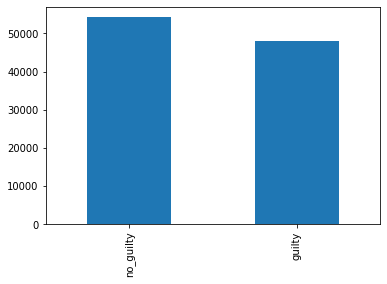

In [5]:
df = df.dropna()
df = df.reset_index()
df.drop(['index'], axis=1, inplace=True) 
df.fd.value_counts().plot(kind='bar')

## Drop Outliers

In [6]:
# Charge
print("Number of categories before dropping: ", len(pd.unique(df['Charge'])))
df = df.groupby('Charge').filter(lambda x : len(x)>99)
print("Number of categories after dropping: ", len(pd.unique(df['Charge'])))
print("Shape of data frame: ", df.shape)

Number of categories before dropping:  5697
Number of categories after dropping:  112
Shape of data frame:  (82003, 16)


In [7]:
# Hearing Result
print("Number of categories:", len(pd.unique(df['HearingResult'])))
print(df.HearingResult.value_counts())
df.drop(['HearingResult'], axis=1, inplace=True) # drop column since there is only one value, 'Finalized', for all entries

Number of categories: 1
Finalized    82003
Name: HearingResult, dtype: int64


In [8]:
# Locality
print("Number of categories:", len(pd.unique(df['Locality'])))
print(df.Locality.value_counts())

# since most of the localities entered is simply "Commonwealth of VA", rather than a specific city, drop 'Locality' column
df.drop(['Locality'], axis=1, inplace=True) 

Number of categories: 186
COMMONWEALTH OF VA      72987
COUNTY OF  FAIRFAX       1689
HENRICO COUNTY            948
CITY OF HARRISONBURG      539
VIRGINIA BEACH            530
                        ...  
TOWN OF VICTORIA            1
MONTGOMERY                  1
BOYKINS                     1
NEW MARKET                  1
TOWN OF WYTHEVILLE          1
Name: Locality, Length: 186, dtype: int64


In [9]:
# Code section
print("Number of categories before dropping: ", len(pd.unique(df['CodeSection'])))
df = df.groupby('CodeSection').filter(lambda x : len(x)>49)
print("Number of categories after dropping: ", len(pd.unique(df['CodeSection'])))
print("Shape of data frame: ", df.shape)

Number of categories before dropping:  259
Number of categories after dropping:  85
Shape of data frame:  (81075, 14)


In [10]:
# Zip code
print("Number of categories before dropping: ", len(pd.unique(df['zip'])))
df = df.groupby('zip').filter(lambda x : len(x)>199)
print("Number of categories after dropping: ", len(pd.unique(df['zip'])))
print("Shape of data frame: ", df.shape)

Number of categories before dropping:  3864
Number of categories after dropping:  95
Shape of data frame:  (33177, 14)


## Changing Data Type

In [11]:
df['HearingDate'] = pd.to_datetime(df.HearingDate)
df['FiledDate'] = pd.to_datetime(df.FiledDate)
df['OffenseDate'] = pd.to_datetime(df.OffenseDate)
df['Status'] = df['Status'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Race'] = df['Race'].astype('category')
df['Charge'] = df['Charge'].astype('category')
df['CodeSection'] = df['CodeSection'].astype('category')
df['Class'] = df['Class'].astype('category')
df['Attorney'] = df['Attorney'].astype('category')
df['zip'] = df['zip'].astype('category')

## Splitting Data (train and test)

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.20, random_state = 24)

## Target, One-Hot, and Label Encoding

### Train Set

In [13]:
# target
from sklearn.preprocessing import LabelEncoder
train['fd_enc'] = LabelEncoder().fit_transform(train.fd)

train = pd.get_dummies(train, prefix=['Sex'], columns=['Gender'], drop_first =True)
train = pd.get_dummies(train, prefix=['Attorney'], columns=['Attorney'], drop_first =True)

from category_encoders import TargetEncoder

encoder = TargetEncoder()
train['stat_enc'] = encoder.fit_transform(train['Status'], train['fd_enc'])

encoder = TargetEncoder()
train['race_enc'] = encoder.fit_transform(train['Race'], train['fd_enc'])

encoder = TargetEncoder()
train['charge_enc'] = encoder.fit_transform(train['Charge'], train['fd_enc'])

encoder = TargetEncoder()
train['code_enc'] = encoder.fit_transform(train['CodeSection'], train['fd_enc'])

encoder = TargetEncoder()
train['class_enc'] = encoder.fit_transform(train['Class'], train['fd_enc'])

encoder = TargetEncoder()
train['zip_enc'] = encoder.fit_transform(train['zip'], train['fd_enc'])

c:\users\chael\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Test Set

In [14]:
test['fd_enc'] = LabelEncoder().fit_transform(test.fd)

test = pd.get_dummies(test, prefix=['Sex'], columns=['Gender'], drop_first =True)
test = pd.get_dummies(test, prefix=['Attorney'], columns=['Attorney'], drop_first =True)

encoder = TargetEncoder()
test['stat_enc'] = encoder.fit_transform(test['Status'], test['fd_enc'])

encoder = TargetEncoder()
test['race_enc'] = encoder.fit_transform(test['Race'], test['fd_enc'])

encoder = TargetEncoder()
test['charge_enc'] = encoder.fit_transform(test['Charge'], test['fd_enc'])

encoder = TargetEncoder()
test['code_enc'] = encoder.fit_transform(test['CodeSection'], test['fd_enc'])

encoder = TargetEncoder()
test['class_enc'] = encoder.fit_transform(test['Class'], test['fd_enc'])

encoder = TargetEncoder()
test['zip_enc'] = encoder.fit_transform(test['zip'], test['fd_enc'])

c:\users\chael\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Correlation Matrix

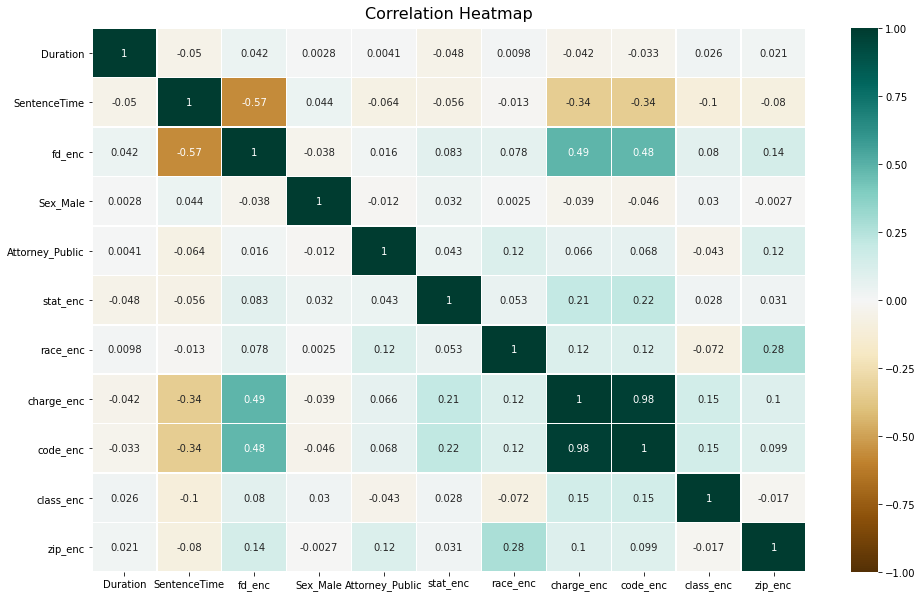

In [14]:
import seaborn as sns

# seaborn heatmap (correlation matrix)
df_corr = train.corr()
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(df_corr, vmin=-1, vmax=1, cmap='BrBG', annot=True, linewidths=.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=10)

plt.show()

## Normalizing Data

In [15]:
train = train[['fd_enc', 'Duration', 'stat_enc', 'Sex_Male', 'code_enc', 'charge_enc', 'zip_enc',
            'race_enc', 'class_enc', 'Attorney_Public']]
test = test[['fd_enc', 'Duration', 'stat_enc', 'Sex_Male', 'code_enc', 'charge_enc', 'zip_enc',
            'race_enc', 'class_enc', 'Attorney_Public']]
 
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

# features
x1 = train.loc[:, train.drop('fd_enc', axis=1).columns].values # train set
x2 = test.loc[:, test.drop('fd_enc', axis=1).columns].values # test set

# target variable
y1 = train.loc[:, ['fd_enc']].values # train set
y2 = test.loc[:, ['fd_enc']].values # test set

x1 = scaler1.fit_transform(x1)
x2 = scaler2.fit_transform(x2)

print(x1)
print(x2)

[[0.01862932 0.         1.         ... 1.         0.         1.        ]
 [0.0514006  0.         0.         ... 1.         0.         0.        ]
 [0.02733206 0.77830369 0.         ... 1.         0.         0.        ]
 ...
 [0.01237422 0.         0.         ... 0.48830784 0.         0.        ]
 [0.02216481 0.46240041 1.         ... 0.48830784 0.         0.        ]
 [0.00448735 1.         1.         ... 0.48830784 0.         0.        ]]
[[0.01756841 0.         1.         ... 0.         0.         0.        ]
 [0.00528607 0.38336373 0.         ... 0.         0.         0.        ]
 [0.00357587 0.84198582 0.         ... 0.         0.         0.        ]
 ...
 [0.02129975 0.84198582 1.         ... 0.55004243 0.         0.        ]
 [0.01585821 0.         1.         ... 0.         0.33902951 0.        ]
 [0.04213308 0.38336373 1.         ... 0.55004243 0.         0.        ]]


## Chi-squared Test

In [18]:
categorical_columns = train.drop(['fd_enc', 'Duration'], axis =1).columns

from scipy.stats import chi2_contingency

#testing the relationship
chi_res = chi2_contingency(pd.crosstab(train['fd_enc'], train['Sex_Male']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))
# p-value is small --> keep variable 'Sex'

Chi2 Statistic: 37.74592167192793, p-value: 8.058501713834706e-10


In [19]:
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(train['fd_enc'], train[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

            Column              Hypothesis
0         stat_enc  Reject Null Hypothesis
1         Sex_Male  Reject Null Hypothesis
2         code_enc  Reject Null Hypothesis
3       charge_enc  Reject Null Hypothesis
4          zip_enc  Reject Null Hypothesis
5         race_enc  Reject Null Hypothesis
6        class_enc  Reject Null Hypothesis
7  Attorney_Public  Reject Null Hypothesis


## Splitting Data (X and y)

In [16]:
X_train = train.loc[:, train.drop(['fd_enc'], axis =1).columns]
y_train = train.loc[:, ['fd_enc']]

X_test = test.loc[:, test.drop(['fd_enc'], axis =1).columns]
y_test = test.loc[:, ['fd_enc']]

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(class_weight='balanced', max_iter = 1000)
log_model.fit(X_train, y_train.values.ravel())

from sklearn.metrics import classification_report, confusion_matrix, roc_curve,auc, accuracy_score

predictions = log_model.predict(X_test)
print(accuracy_score(y_test, predictions))

print(classification_report(y_test,predictions))

0.7148884870403858
              precision    recall  f1-score   support

           0       0.69      0.64      0.66      2899
           1       0.73      0.77      0.75      3737

    accuracy                           0.71      6636
   macro avg       0.71      0.71      0.71      6636
weighted avg       0.71      0.71      0.71      6636



In [22]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg = LogisticRegression(class_weight='balanced', max_iter = 1500)
logreg_cv = GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(X_train,y_train.values.ravel())

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

# https://www.kaggle.com/enespolat/grid-search-with-logistic-regression

c:\users\chael\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\chael\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\chael\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\chael\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\users\chael\appdata\local\prog

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.7207719009929936


In [25]:
logreg2 = LogisticRegression(C=1.0, penalty='l2', class_weight='balanced', max_iter = 1500)
logreg2.fit(X_train, y_train.values.ravel())

y_pred = logreg2.predict(X_test)
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test,y_pred))

0.7148884870403858
              precision    recall  f1-score   support

           0       0.69      0.64      0.66      2899
           1       0.73      0.77      0.75      3737

    accuracy                           0.71      6636
   macro avg       0.71      0.71      0.71      6636
weighted avg       0.71      0.71      0.71      6636



In [27]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': logreg2.coef_[0]
})

importances = importances.sort_values(by='Importance', ascending=False)

print(importances)

         Attribute  Importance
5          zip_enc    3.439977
4       charge_enc    3.157112
3         code_enc    1.874935
0         Duration    0.000810
2         Sex_Male   -0.116761
8  Attorney_Public   -0.162116
6         race_enc   -0.653625
7        class_enc   -1.161872
1         stat_enc   -1.508341


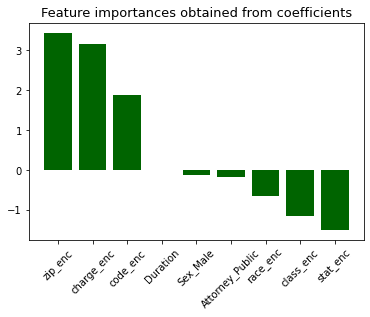

In [28]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='darkgreen')
plt.title('Feature importances obtained from coefficients', size=13)
plt.xticks(rotation=45)
plt.show()
# https://towardsdatascience.com/3-essential-ways-to-calculate-feature-importance-in-python-2f9149592155

In [29]:
# drop 'Duration'
X_train.drop(['Duration'], axis=1, inplace=True) 
X_test.drop(['Duration'], axis=1, inplace=True) 

# run logistic regression again
logreg2 = LogisticRegression(C=1.0, penalty='l2', class_weight='balanced', max_iter = 1500)
logreg2.fit(X_train, y_train.values.ravel())

y_pred = logreg2.predict(X_test)
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test,y_pred))

from sklearn import metrics 
log_acc = metrics.accuracy_score(y_test, y_pred)
log_prec = metrics.precision_score(y_test, y_pred)
log_re = metrics.recall_score(y_test, y_pred)
log_f1 = metrics.f1_score(y_test, y_pred)

0.7153405666063893
              precision    recall  f1-score   support

           0       0.69      0.64      0.66      2899
           1       0.73      0.78      0.75      3737

    accuracy                           0.72      6636
   macro avg       0.71      0.71      0.71      6636
weighted avg       0.71      0.72      0.71      6636



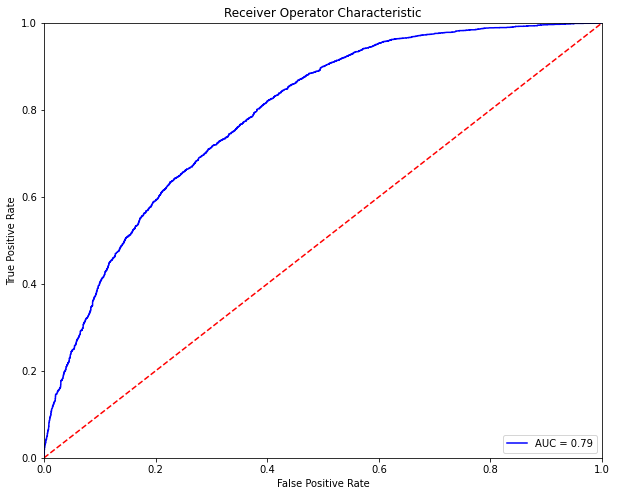

In [30]:
#Creating the ROC-AUC plot
preds = logreg2.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
log_roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(log_roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## KNN

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

neighbors = []
cv_scores = []

for k in range(1, 21, 2): 
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of k is 19. 


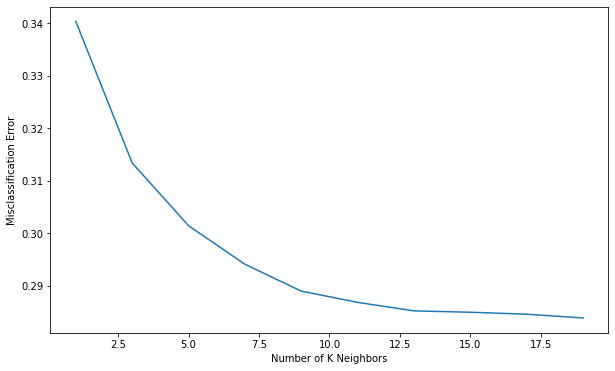

In [32]:
MSE = [1-x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of k is %d. ' %optimal_k)

plt.figure(figsize=(10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of K Neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)

# train model
knn_model.fit(X_train, y_train.values.ravel())

# predict output
y_pred = knn_model.predict(X_test)
y_score = knn_model.predict_proba(X_test)[:, 1]

In [34]:
from sklearn import metrics

knn_acc = metrics.accuracy_score(y_test, y_pred)
knn_prec = metrics.precision_score(y_test, y_pred)
knn_re = metrics.recall_score(y_test, y_pred)
knn_f1 = metrics.f1_score(y_test, y_pred)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7088607594936709
              precision    recall  f1-score   support

           0       0.70      0.57      0.63      2899
           1       0.71      0.81      0.76      3737

    accuracy                           0.71      6636
   macro avg       0.71      0.69      0.70      6636
weighted avg       0.71      0.71      0.70      6636



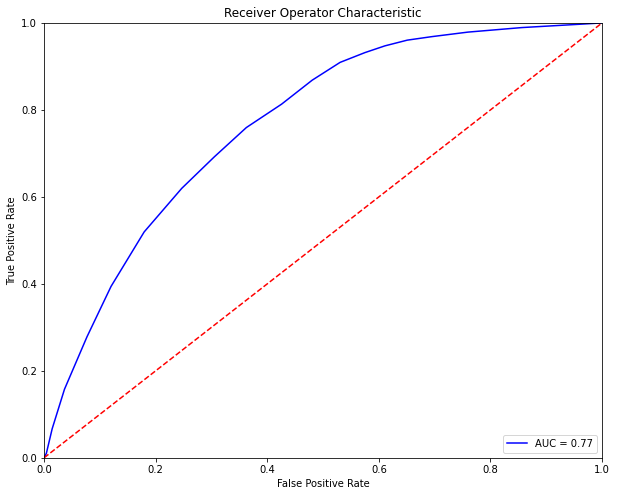

In [35]:
#Creating the ROC-AUC plot
preds = knn_model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
knn_roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(knn_roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train.values.ravel())

y_pred = nb_classifier.predict(X_test)

In [37]:
nb_acc = metrics.accuracy_score(y_test, y_pred)
nb_prec = metrics.precision_score(y_test, y_pred)
nb_re = metrics.recall_score(y_test, y_pred)
nb_f1 = metrics.f1_score(y_test, y_pred)

print("Accuracy:", nb_acc)
print(classification_report(y_test, y_pred))

Accuracy: 0.7218203737191079
              precision    recall  f1-score   support

           0       0.76      0.53      0.62      2899
           1       0.70      0.87      0.78      3737

    accuracy                           0.72      6636
   macro avg       0.73      0.70      0.70      6636
weighted avg       0.73      0.72      0.71      6636



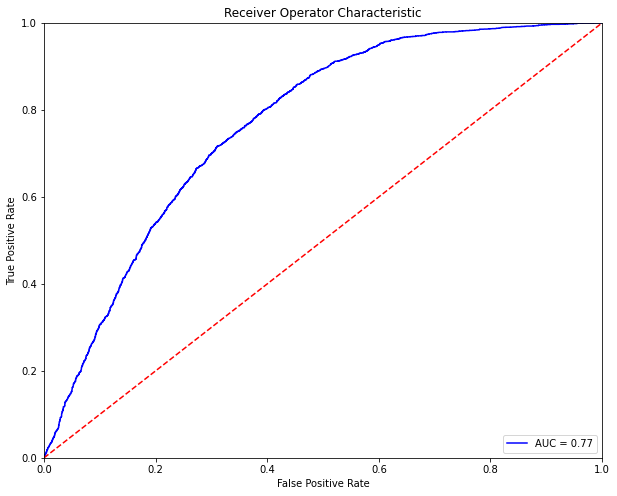

In [38]:
#Creating the ROC-AUC plot
preds = nb_classifier.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
nb_roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(nb_roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':[1000],'n_jobs':[-1], 'max_features': [0.5,0.7,0.9], 
              'max_depth': [3,5,7],'min_samples_leaf':[1,10],'random_state':[14]} 

rf_clf = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring='accuracy') #roc_auc

rf_clf.fit(X_train, y_train.values.ravel())

y_pred = rf_clf.predict(X_test)

# https://towardsdatascience.com/types-of-ensemble-methods-in-machine-learning-4ddaf73879db

In [40]:
print("tuned hpyerparameters :(best parameters) ",rf_clf.best_params_)
print("accuracy :",rf_clf.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 7, 'max_features': 0.5, 'min_samples_leaf': 10, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 14}
accuracy : 0.7256700207507605


In [41]:
rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=7, max_features=0.5, 
                                min_samples_leaf=1, n_jobs=-1, random_state=24)

rf_clf.fit(X_train, y_train.values.ravel())

y_pred = rf_clf.predict(X_test)

In [42]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': rf_clf.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)

print(importances)

         Attribute  Importance
3       charge_enc    0.548868
2         code_enc    0.341676
4          zip_enc    0.067514
0         stat_enc    0.020412
5         race_enc    0.007301
6        class_enc    0.004883
1         Sex_Male    0.004754
7  Attorney_Public    0.004591


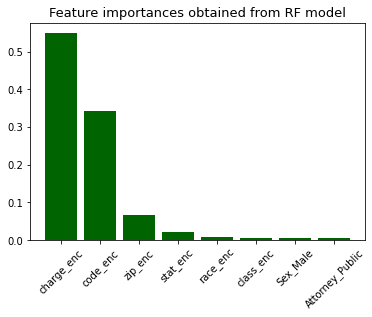

In [43]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='darkgreen')
plt.title('Feature importances obtained from RF model', size=13)
plt.xticks(rotation=45)
plt.show()

In [44]:
rf_acc = metrics.accuracy_score(y_test, y_pred)
rf_prec = metrics.precision_score(y_test, y_pred)
rf_re = metrics.recall_score(y_test, y_pred)
rf_f1 = metrics.f1_score(y_test, y_pred)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7254370102471368
              precision    recall  f1-score   support

           0       0.76      0.54      0.63      2899
           1       0.71      0.87      0.78      3737

    accuracy                           0.73      6636
   macro avg       0.74      0.70      0.71      6636
weighted avg       0.73      0.73      0.72      6636



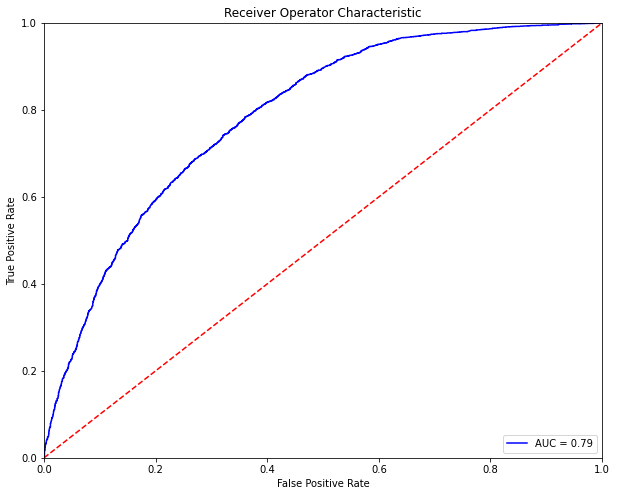

In [45]:
#Creating the ROC-AUC plot
preds = rf_clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
rf_roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(rf_roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic Regression Ensemble

In [67]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

logbagClf = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators = 1000, 
                              oob_score = True, random_state = 90)

logbagClf.fit(X_train, y_train.values.ravel())

y_pred = logbagClf.predict(X_test)

In [68]:
lb_acc = metrics.accuracy_score(y_test, y_pred)
lb_prec = metrics.precision_score(y_test, y_pred)
lb_re = metrics.recall_score(y_test, y_pred)
lb_f1 = metrics.f1_score(y_test, y_pred)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7261904761904762
              precision    recall  f1-score   support

           0       0.75      0.56      0.64      2899
           1       0.72      0.85      0.78      3737

    accuracy                           0.73      6636
   macro avg       0.73      0.71      0.71      6636
weighted avg       0.73      0.73      0.72      6636



In [69]:
print("OOB score:", round(logbagClf.oob_score_ * 100, 2), "%")

OOB score: 72.17 %


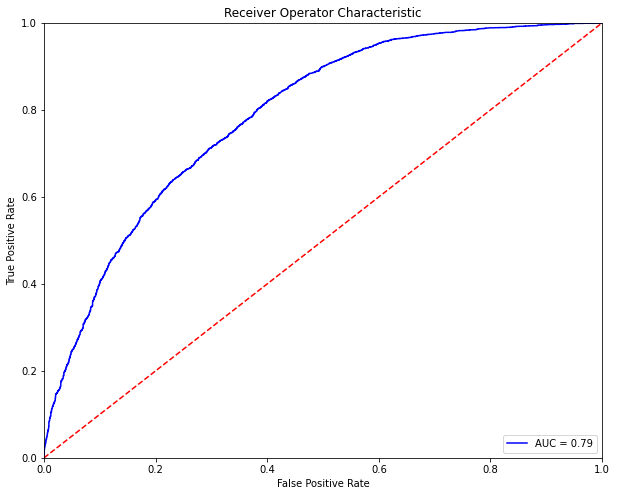

In [70]:
#Creating the ROC-AUC plot
preds = logbagClf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
lb_roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(lb_roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Max Voting

In [50]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

rfClf = RandomForestClassifier(n_estimators=1000, random_state=0) # 1000 trees. 
svmClf = SVC(probability=True, random_state=0) # probability calculation
logClf = LogisticRegression(random_state=0)
# nbClf = GaussianNB()

# constructing the ensemble classifier by mentioning the individual classifiers.
clf2 = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('lr', logClf)], voting='soft') 

# train the ensemble classifier
clf2.fit(X_train, y_train.values.ravel())

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=1000,
                                                     random_state=0)),
                             ('svm', SVC(probability=True, random_state=0)),
                             ('lr', LogisticRegression(random_state=0))],
                 voting='soft')

In [74]:
rfClf = RandomForestClassifier(n_estimators=1000, random_state=0) # 1000 trees. 
svmClf = SVC(probability=True, random_state=0) # probability calculation
logClf = LogisticRegression(random_state=0)
# nbClf = GaussianNB()

# constructing the ensemble classifier by mentioning the individual classifiers.
clf3 = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('lr', logClf)], voting='hard') 

# train the ensemble classifier
clf3.fit(X_train, y_train.values.ravel())

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=1000,
                                                     random_state=0)),
                             ('svm', SVC(probability=True, random_state=0)),
                             ('lr', LogisticRegression(random_state=0))])

In [51]:
y_pred = clf2.predict(X_test)

mv_acc = metrics.accuracy_score(y_test, y_pred)
mv_prec = metrics.precision_score(y_test, y_pred)
mv_re = metrics.recall_score(y_test, y_pred)
mv_f1 = metrics.f1_score(y_test, y_pred)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7230259192284508
              precision    recall  f1-score   support

           0       0.75      0.55      0.64      2899
           1       0.71      0.85      0.78      3737

    accuracy                           0.72      6636
   macro avg       0.73      0.70      0.71      6636
weighted avg       0.73      0.72      0.72      6636



In [75]:
y_pred = clf3.predict(X_test)

mv2_acc = metrics.accuracy_score(y_test, y_pred)
mv2_prec = metrics.precision_score(y_test, y_pred)
mv2_re = metrics.recall_score(y_test, y_pred)
mv2_f1 = metrics.f1_score(y_test, y_pred)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7248342374924653
              precision    recall  f1-score   support

           0       0.77      0.53      0.63      2899
           1       0.71      0.87      0.78      3737

    accuracy                           0.72      6636
   macro avg       0.74      0.70      0.70      6636
weighted avg       0.73      0.72      0.71      6636



In [76]:
print("Hard voting accuracy:", round(mv2_acc * 100, 2), '%')
print("Soft voting accuracy:", round(mv_acc * 100, 2), '%')

Hard voting accuracy: 72.48 %
Soft voting accuracy: 72.3 %


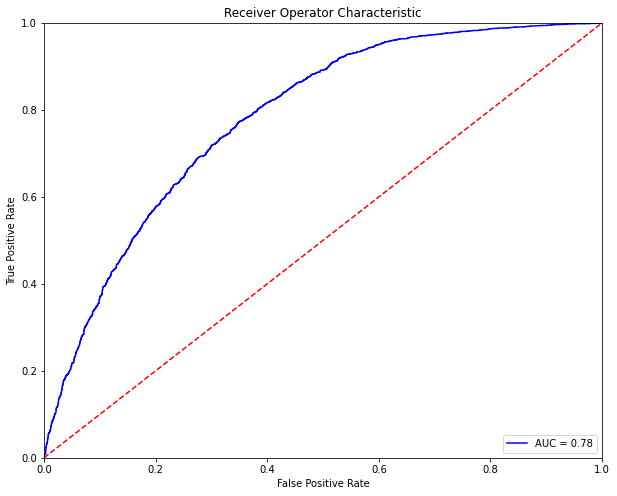

In [52]:
#Creating the ROC-AUC plot
preds = clf2.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
mv_roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(mv_roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## XGBoost

In [53]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

parameters = {'n_estimators':[1000],'max_depth': [3,5,7],'random_state':[14], 
              'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]} 

xgb_clf = GridSearchCV(xgb.XGBClassifier(), parameters, cv=5, scoring='accuracy') #roc_auc

# xgb_clf = xgb.XGBClassifier(max_depth=3,n_estimators=1000,learning_rate=0.05)
    
xgb_clf.fit(X_train,y_train.values.ravel())

y_pred = xgb_clf.predict(X_test)

c:\users\chael\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:19:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:19:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:19:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[11:21:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:22:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:22:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:22:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[11:24:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:24:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:24:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:24:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[11:27:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:27:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:27:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:27:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [54]:
xgb_acc = metrics.accuracy_score(y_test, y_pred)
xgb_prec = metrics.precision_score(y_test, y_pred)
xgb_re = metrics.recall_score(y_test, y_pred)
xgb_f1 = metrics.f1_score(y_test, y_pred)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7151898734177216
              precision    recall  f1-score   support

           0       0.74      0.54      0.62      2899
           1       0.71      0.85      0.77      3737

    accuracy                           0.72      6636
   macro avg       0.72      0.70      0.70      6636
weighted avg       0.72      0.72      0.71      6636



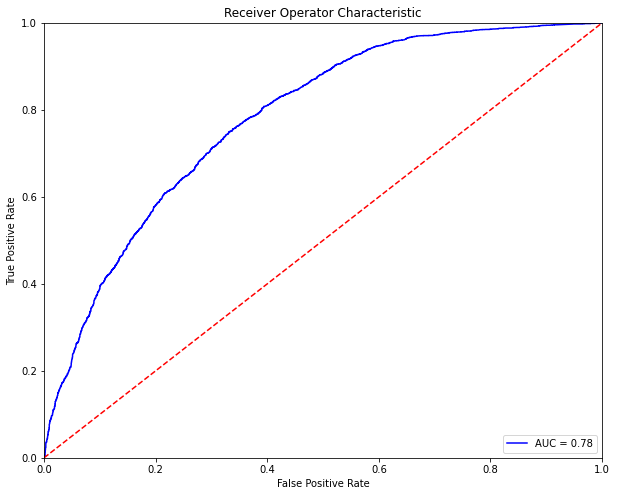

In [55]:
#Creating the ROC-AUC plot
preds = xgb_clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
xgb_roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(xgb_roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Bagging

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test)

In [24]:
bag_acc = metrics.accuracy_score(y_test, y_pred)
bag_prec = metrics.precision_score(y_test, y_pred)
bag_re = metrics.recall_score(y_test, y_pred)
bag_f1 = metrics.f1_score(y_test, y_pred)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6731464737793852
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      2899
           1       0.71      0.70      0.71      3737

    accuracy                           0.67      6636
   macro avg       0.67      0.67      0.67      6636
weighted avg       0.67      0.67      0.67      6636



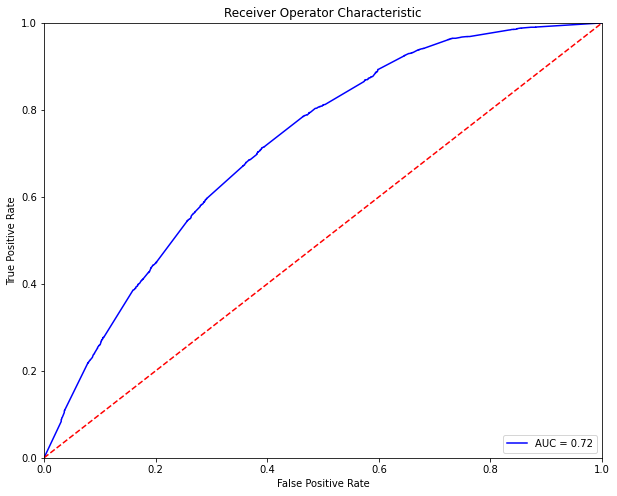

In [58]:
#Creating the ROC-AUC plot
preds = model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
bag_roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(bag_roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Gradient Boosting

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test)

In [60]:
gb_acc = metrics.accuracy_score(y_test, y_pred)
gb_prec = metrics.precision_score(y_test, y_pred)
gb_re = metrics.recall_score(y_test, y_pred)
gb_f1 = metrics.f1_score(y_test, y_pred)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.724080771549126
              precision    recall  f1-score   support

           0       0.79      0.50      0.61      2899
           1       0.70      0.90      0.79      3737

    accuracy                           0.72      6636
   macro avg       0.74      0.70      0.70      6636
weighted avg       0.74      0.72      0.71      6636



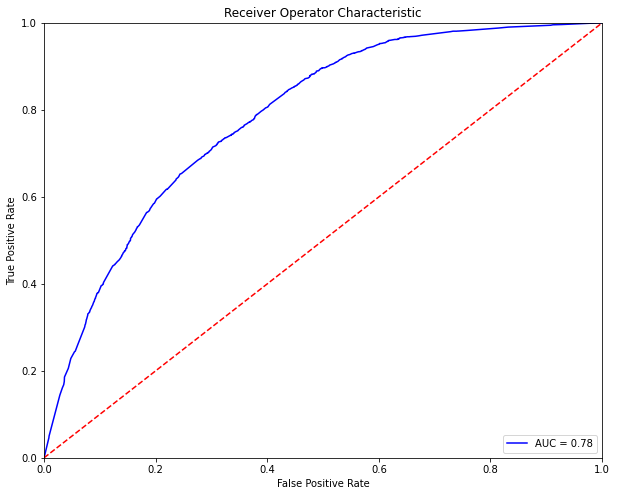

In [61]:
#Creating the ROC-AUC plot
preds = model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
gb_roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(gb_roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Results (Table)

In [62]:
# !pip install tabulate
# https://towardsdatascience.com/how-to-easily-create-tables-in-python-2eaea447d8fd

from tabulate import tabulate

In [71]:
results = {'Models': ['LR', 'KNN', 'NB', 'RF', 'LRen', 'MV', 'XGB', 'Bag', 'GB'], 
          'Accuracy': [log_acc, knn_acc, nb_acc, rf_acc, lb_acc, mv_acc, xgb_acc, bag_acc, gb_acc],
          'Precision': [log_prec, knn_prec, nb_prec, rf_prec, lb_prec, mv_prec, xgb_prec, bag_prec, gb_prec],
          'Recall': [log_re, knn_re, nb_re, rf_re, lb_re, mv_re, xgb_re, bag_re, gb_re],
          'F1': [log_f1, knn_f1, nb_f1, rf_f1, lb_f1, mv_f1, xgb_f1, bag_f1, gb_f1],
          'AUC': [log_roc_auc, knn_roc_auc, nb_roc_auc, rf_roc_auc, lb_roc_auc, mv_roc_auc, xgb_roc_auc, bag_roc_auc, gb_roc_auc]}

for key in results:
    for i in range(9):
        if type(results[key][i]) != str:
            results[key][i] = round(results[key][i], 2)

print(tabulate(results, headers='keys', tablefmt='fancy_grid'))

╒══════════╤════════════╤═════════════╤══════════╤══════╤═══════╕
│ Models   │   Accuracy │   Precision │   Recall │   F1 │   AUC │
╞══════════╪════════════╪═════════════╪══════════╪══════╪═══════╡
│ LR       │       0.72 │        0.73 │     0.78 │ 0.75 │  0.79 │
├──────────┼────────────┼─────────────┼──────────┼──────┼───────┤
│ KNN      │       0.71 │        0.71 │     0.81 │ 0.76 │  0.77 │
├──────────┼────────────┼─────────────┼──────────┼──────┼───────┤
│ NB       │       0.72 │        0.7  │     0.87 │ 0.78 │  0.77 │
├──────────┼────────────┼─────────────┼──────────┼──────┼───────┤
│ RF       │       0.73 │        0.71 │     0.87 │ 0.78 │  0.79 │
├──────────┼────────────┼─────────────┼──────────┼──────┼───────┤
│ LRen     │       0.73 │        0.72 │     0.85 │ 0.78 │  0.79 │
├──────────┼────────────┼─────────────┼──────────┼──────┼───────┤
│ MV       │       0.72 │        0.71 │     0.85 │ 0.78 │  0.78 │
├──────────┼────────────┼─────────────┼──────────┼──────┼───────┤
│ XGB     

In [72]:
results = {'Models': ['LR', 'KNN', 'NB', 'RF', 'Bag'], 
          'Accuracy': [log_acc, knn_acc, nb_acc, rf_acc, bag_acc],
          'Precision': [log_prec, knn_prec, nb_prec, rf_prec, bag_prec],
          'Recall': [log_re, knn_re, nb_re, rf_re, bag_re],
          'F1': [log_f1, knn_f1, nb_f1, rf_f1, bag_f1],
          'AUC': [log_roc_auc, knn_roc_auc, nb_roc_auc, rf_roc_auc, bag_roc_auc]}

for key in results:
    for i in range(5):
        if type(results[key][i]) != str:
            results[key][i] = round(results[key][i], 2)

print(tabulate(results, headers='keys', tablefmt='fancy_grid'))

╒══════════╤════════════╤═════════════╤══════════╤══════╤═══════╕
│ Models   │   Accuracy │   Precision │   Recall │   F1 │   AUC │
╞══════════╪════════════╪═════════════╪══════════╪══════╪═══════╡
│ LR       │       0.72 │        0.73 │     0.78 │ 0.75 │  0.79 │
├──────────┼────────────┼─────────────┼──────────┼──────┼───────┤
│ KNN      │       0.71 │        0.71 │     0.81 │ 0.76 │  0.77 │
├──────────┼────────────┼─────────────┼──────────┼──────┼───────┤
│ NB       │       0.72 │        0.7  │     0.87 │ 0.78 │  0.77 │
├──────────┼────────────┼─────────────┼──────────┼──────┼───────┤
│ RF       │       0.73 │        0.71 │     0.87 │ 0.78 │  0.79 │
├──────────┼────────────┼─────────────┼──────────┼──────┼───────┤
│ Bag      │       0.67 │        0.7  │     0.72 │ 0.71 │  0.72 │
╘══════════╧════════════╧═════════════╧══════════╧══════╧═══════╛


In [73]:
results = {'Models': ['LRen', 'MV', 'XGB', 'GB'], 
          'Accuracy': [lb_acc, mv_acc, xgb_acc, gb_acc],
          'Precision': [lb_prec, mv_prec, xgb_prec,gb_prec],
          'Recall': [lb_re, mv_re, xgb_re, gb_re],
          'F1': [lb_f1, mv_f1, xgb_f1, gb_f1],
          'AUC': [lb_roc_auc, mv_roc_auc, xgb_roc_auc, gb_roc_auc]}

for key in results:
    for i in range(4):
        if type(results[key][i]) != str:
            results[key][i] = round(results[key][i], 2)

print(tabulate(results, headers='keys', tablefmt='fancy_grid'))

╒══════════╤════════════╤═════════════╤══════════╤══════╤═══════╕
│ Models   │   Accuracy │   Precision │   Recall │   F1 │   AUC │
╞══════════╪════════════╪═════════════╪══════════╪══════╪═══════╡
│ LRen     │       0.73 │        0.72 │     0.85 │ 0.78 │  0.79 │
├──────────┼────────────┼─────────────┼──────────┼──────┼───────┤
│ MV       │       0.72 │        0.71 │     0.85 │ 0.78 │  0.78 │
├──────────┼────────────┼─────────────┼──────────┼──────┼───────┤
│ XGB      │       0.72 │        0.71 │     0.85 │ 0.77 │  0.78 │
├──────────┼────────────┼─────────────┼──────────┼──────┼───────┤
│ GB       │       0.72 │        0.7  │     0.9  │ 0.79 │  0.78 │
╘══════════╧════════════╧═════════════╧══════════╧══════╧═══════╛
